<h2 style='text-align: center;'> <font color='Green'><u>Assignment on Classification</u></font> </h2>


Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)

<h3 style='text-align: right;'> Submitted By:<font color='BLUE'>ATHIRA PRAKASH </font></h3>

## 1.Read the dataset to python environment

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

Read the dataset into a Pandas DataFrame

In [2]:
data = pd.read_excel(r"D:\DSA\data\iris.xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Displaying the first five rows of the dataset

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


 shape of the dataset

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Do the necessary pre-processing steps

### a. Duplicate check

In [8]:
data.duplicated().sum()

3

In [9]:
# Remove duplicates
data = data.drop_duplicates()

In [10]:
data.shape

(147, 5)

### b.Missing value handle

In [11]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values in three columns.SL                7
SW                6
PL 6

In [12]:
freqgraph = data.select_dtypes(include=['float'])

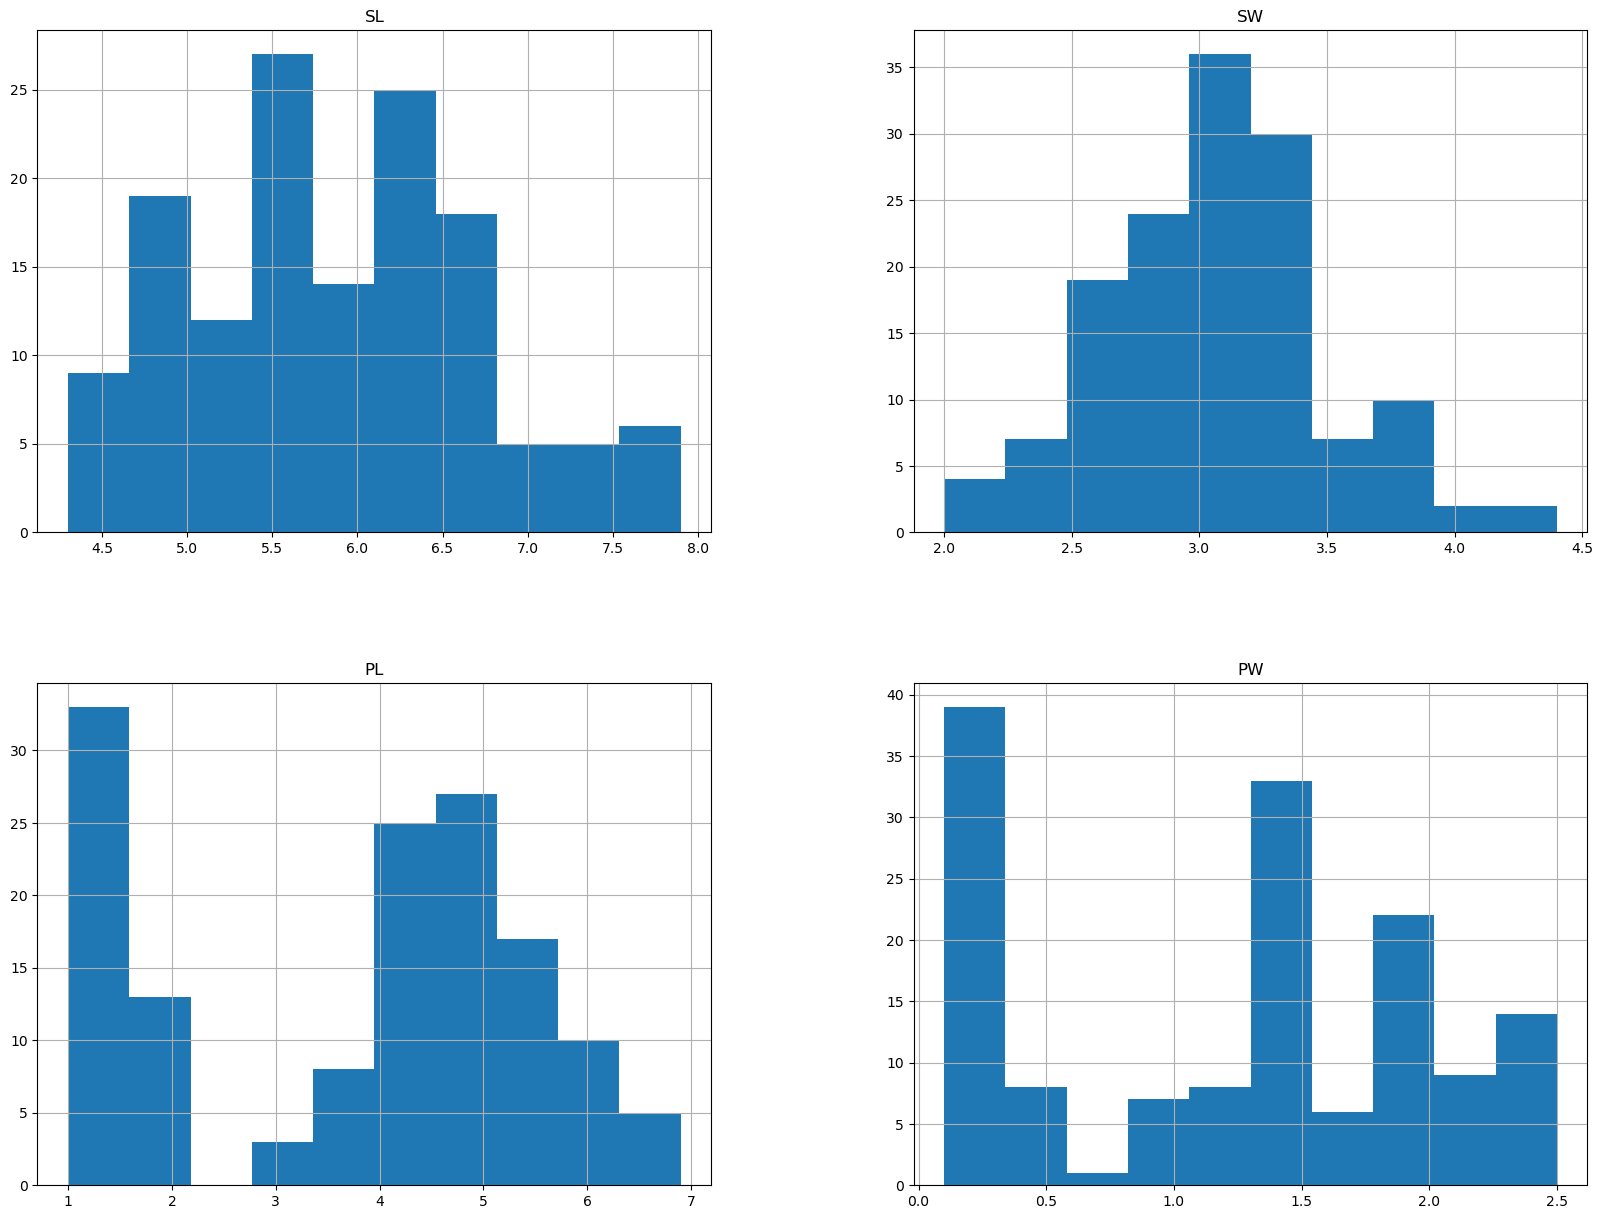

In [13]:
freqgraph.hist(figsize=(20,15));

In [14]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [15]:
for col in ['SL', 'SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())

C:\Users\USER\AppData\Local\Temp\ipykernel_29700\3136872050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(data[col].median())


In [16]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### c.Outlier Handling

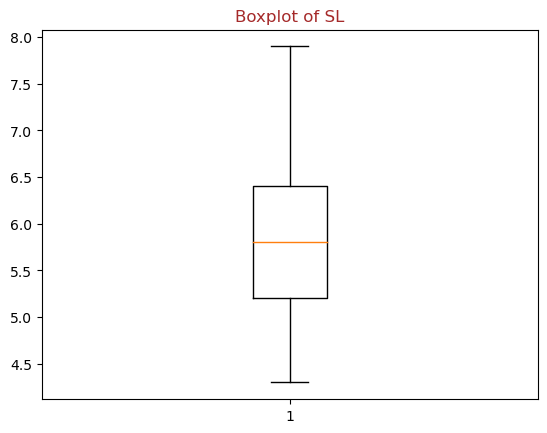

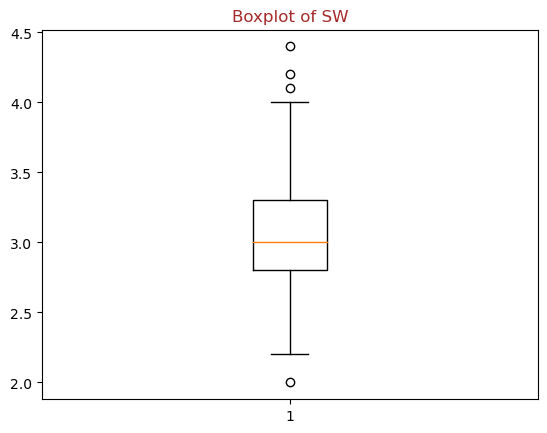

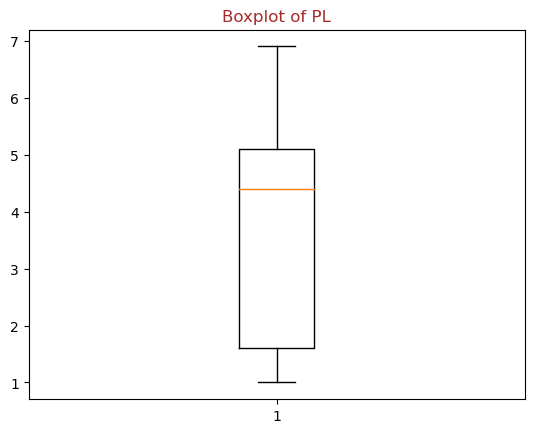

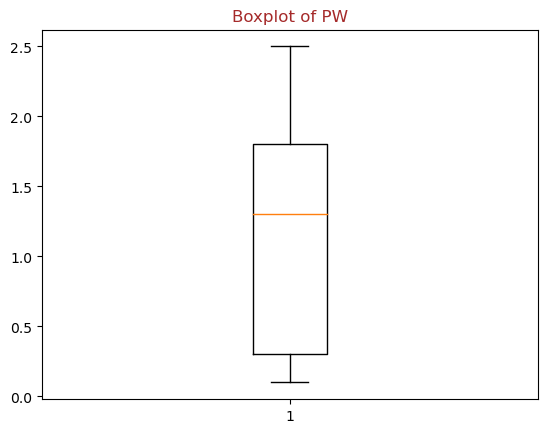

In [17]:
num_col = data.select_dtypes(include=['float'])
for col in num_col:
    plt.figure()
    plt.boxplot(data[col])
    plt.title('Boxplot of {}'.format(col), color = 'brown')
    plt.show()

In [18]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.05
4.05


In [19]:
outlier=[]
for x in data['SW']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)

In [20]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [21]:
data['SW']=np.where(data['SW']>upp_lim,upp_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

C:\Users\USER\AppData\Local\Temp\ipykernel_29700\2201811787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SW']=np.where(data['SW']>upp_lim,upp_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))


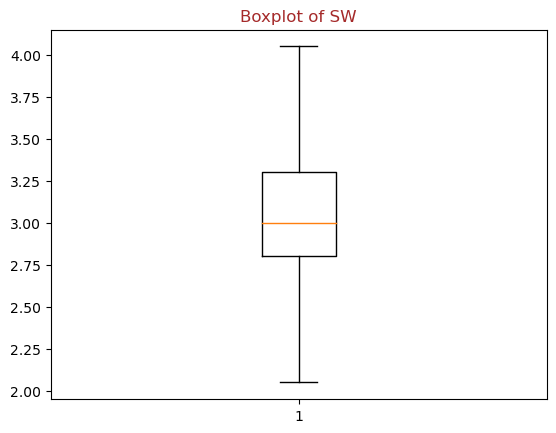

In [22]:
plt.figure()
plt.boxplot(data['SW'])
plt.title('Boxplot of SW', color = 'brown')
plt.show()

### d.Correlation check

In [23]:
corr_matrix = data.corr()

In [24]:
corr_matrix 

,SL,SW,PL,PW
SL,1.000000,-0.099252,0.828716,0.799399
SW,-0.099252,1.000000,-0.403762,-0.336283
PL,0.828716,-0.403762,1.000000,0.934041
PW,0.799399,-0.336283,0.934041,1.000000


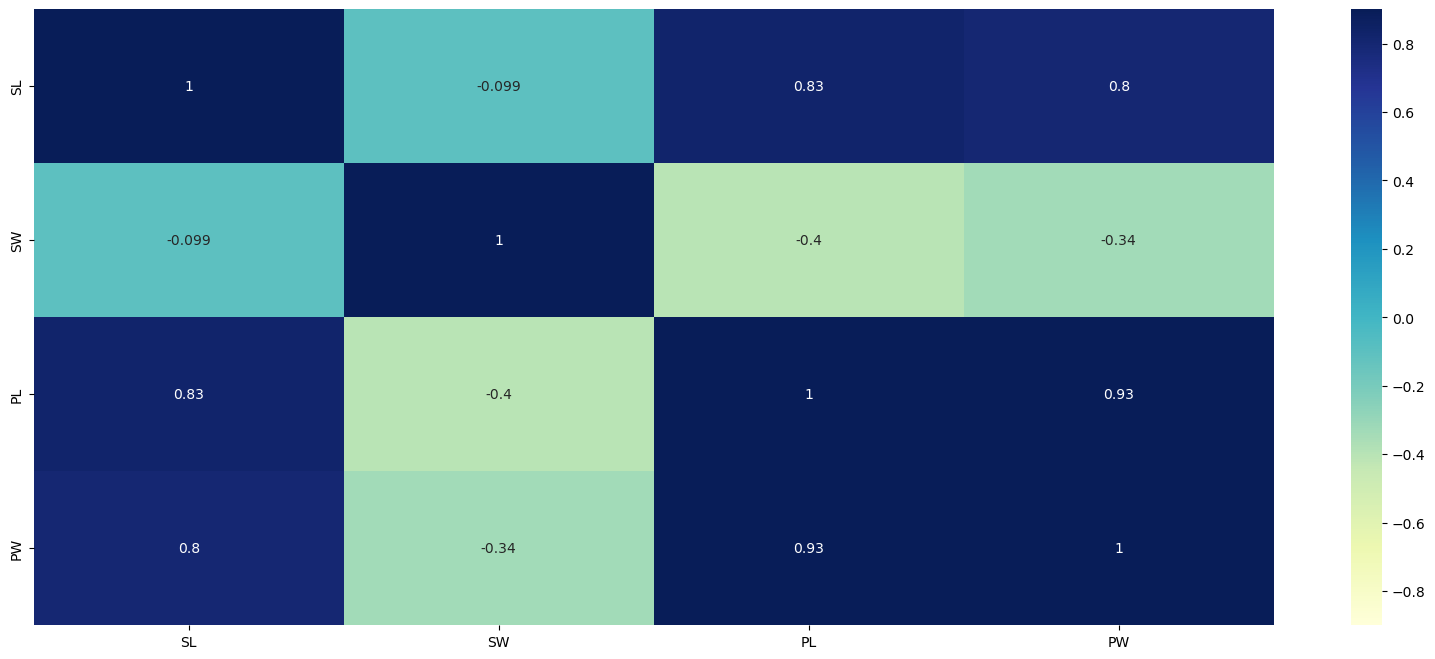

In [25]:
plt.subplots(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',vmax=0.9,vmin=-0.9)
plt.show()

 SL is positively correlated with SW, PL, and PW. This means that as SL increases, SW, PL, and PW also tend to increase. However, SL is not perfectly correlated with any of these variables. There is some variation in the data, which means that there are other factors that can affect SW, PL, and PW.

### e.Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
data1 = data.drop('Classification', axis=1)
data1.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
data1 = scaler.fit_transform(data1)
type(data1)

numpy.ndarray

In [29]:
data1 = pd.DataFrame(data1, columns=['SL', 'SW', 'PL', 'PW'])

In [30]:
data1.describe()

,SL,SW,PL,PW
count,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02
mean,8.163821e-16,-9.318887e-16,-7.401487e-17,-3.572350e-16
std,1.003419e+00,1.003419e+00,1.003419e+00,1.003419e+00
min,-1.943041e+00,-2.411516e+00,-1.632359e+00,-1.468099e+00
25%,-8.268261e-01,-5.948460e-01,-1.283077e+00,-1.203301e+00
50%,-8.268261e-02,-1.104008e-01,3.469061e-01,1.206904e-01
75%,6.614609e-01,6.162671e-01,7.544019e-01,7.826860e-01
max,2.521820e+00,2.432937e+00,1.802248e+00,1.709480e+00


Scaling the features We need to scale the features so that they are on the same scale. This will improve the performance of our classification models.

### f.Encoding 

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data1['Classification']= le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.4,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Find out which classification model gives the best result 

### Split the dataset into training and testing datasets

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = data1.drop('Classification', axis=1)
y = data1['Classification']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression

Training the Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)



LogisticRegression()

Predicting the classification for the testing dataset

In [36]:
y_pred_lr = logit_model.predict(X_test)

Evaluating the performance of the model

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Accuracy is: ',round(accuracy_score(y_test,y_pred_lr),2))
print('Precision is: ',round(precision_score(y_test,y_pred_lr,average='micro'),2))
print('Recall score is: ',round(recall_score(y_test,y_pred_lr,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_lr,average='micro'),2))

Accuracy is:  0.97
Precision is:  0.97
Recall score is:  0.97
f1 score is:  0.97


In [38]:
confusion_matrix(y_test,y_pred_lr)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

## 2. K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier



k_val = np.arange(3,15)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train, y_train)
    pred  = classifier.predict(X_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

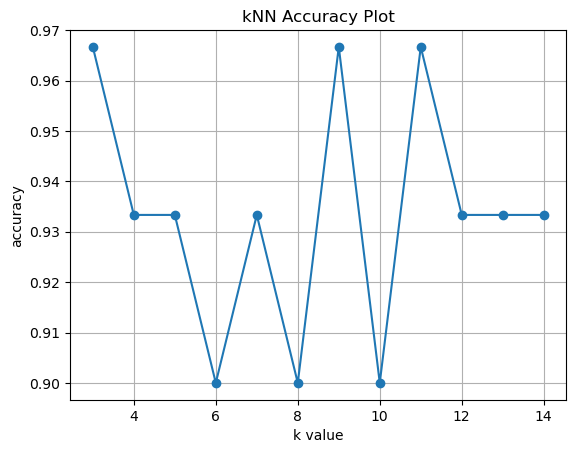

In [40]:
plt.plot(k_val,acc_val,'o-')
plt.title('kNN Accuracy Plot')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

Training the kNN Regression model

In [41]:
classifier = KNeighborsClassifier(n_neighbors =11 , metric = 'minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Predicting the classification for the testing dataset

In [42]:
y_pred_knn  = classifier.predict(X_test)

Evaluating the performance of the model

In [43]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_knn),2))
print('Precision is: ',round(precision_score(y_test,y_pred_knn,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_knn,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_knn,average='micro'),2))

accuracy is:  0.97
Precision is:  0.97
recall score is:  0.97
f1 score is:  0.97


In [44]:
confusion_matrix(y_test,y_pred_knn)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

## 3. Decision Tree

Training the Decision Regression model

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Predicting the classification for the testing dataset

In [46]:
y_pred_dt  = dt_model.predict(X_test)

Evaluating the performance of the model

In [47]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_dt),2))
print('Precision is: ',round(precision_score(y_test,y_pred_dt,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_dt,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_dt,average='micro'),2))

accuracy is:  0.93
Precision is:  0.93
recall score is:  0.93
f1 score is:  0.93


In [48]:
confusion_matrix(y_test,y_pred_dt)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

##  4. Support Vector Machine Model

Training the SVM Regression model

In [49]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

Predicting the classification for the testing dataset

In [50]:
y_pred_svm = dt_model.predict(X_test)

Evaluating the performance of the model

In [51]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred_svm),2))
print('Precision is: ',round(precision_score(y_test,y_pred_svm,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_svm,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_svm,average='micro'),2))

accuracy is:  0.93
Precision is:  0.93
recall score is:  0.93
f1 score is:  0.93


In [52]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


## 5. Random Forest

Training the Random Forest Regression model

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred_rf=rf_clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is: ',round(accuracy_score(y_test,y_pred_rf),2))
print('Precision is: ',round(precision_score(y_test,y_pred_rf,average='micro'),2))
print('recall score is: ',round(recall_score(y_test,y_pred_rf,average='micro'),2))
print('f1 score is: ',round(f1_score(y_test,y_pred_rf,average='micro'),2))

accuracy is:  0.93
Precision is:  0.93
recall score is:  0.93
f1 score is:  0.93


In [56]:
print(confusion_matrix(y_test,y_pred_rf))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [57]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','kNN','Support Vector Machines' ,'Decision Tree','Random Forest'],
    'Score': [round(accuracy_score(y_test,y_pred_lr),2),round(accuracy_score(y_test,y_pred_knn),2),round(accuracy_score(y_test,y_pred_svm),2),round(accuracy_score(y_test,y_pred_dt),2),round(accuracy_score(y_test,y_pred_rf),2)]})

result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Score
0,Logistic Regression,0.97
1,kNN,0.97
2,Support Vector Machines,0.93
3,Decision Tree,0.93
4,Random Forest,0.93


#### INFERENCE: Based on the accuracy scores  Logistic Regression and KNN, and are the top two models for this dataset. They all have an accuracy score of 0.97, which is very high. Random Forest ,Support Vector Machines and Decision Tree are also good models, but they have a slightly lower accuracy score of 0.93.